# Extract data from Evoked.
# Searching max and min values  and time
# Plot topomaps

In [1]:
import mne
import os.path as op
from matplotlib import pyplot as plt
import numpy as np
import copy
import pandas as pd

# Extract data from Evoked

In [42]:
def grand_average_data(subjects, data_path, planar, tmin, tmax, sensor_num = 0):
    #Make list of evoked
    all_evoked = []
    for subj in subjects:
        data = op.join(data_path, planar.format(subj)) #If you need to make combine planar for beta, please use the combine_planar.py
        evk = mne.Evoked(data)
        all_evoked.append(evk)

    ###### SHIFT TIME #######
    
    #shift time scale if it is needed. Comment if you don't need
    
    #for i in all_evoked:
    #    i.shift_time(-2.0, relative=False)
        
        ##############
        
    interval = []
    
    for i in all_evoked:
        x = i.crop(tmin=tmin, tmax=tmax)   #crop - mne function

        interval.append(x.data)
        
    donor = all_evoked[0].crop(tmin=tmin, tmax=tmax)
        
    #n = ((tmax*1000-tmin*1000)/(len(x.data[sensor_num])-1))/1000
    
    #time = np.arange(tmin, (tmax + 0.001), n)

    amplitude = np.array(interval)
    
    mean_amp = np.mean(amplitude.data, axis = 0)
    
    grand_ave = np.mean(mean_amp.data, axis = 0)
    
    donor.data = grand_ave
    
    return (donor)
    

# Example

In [43]:
# take data from evoked fif files for combined planar
data_path = "/home/vtretyakova/Desktop/self_pace_new_exp_15_30/self_pace_day1_comb_15_30_Db"
planar = "{0}_beta_comb_15_30-Db.fif"

subjects = []
for i in range(1,29):
    if i < 10:
        subjects += ['L00' + str(i)]
    else:
        subjects += ['L0' + str(i)]
        
#subjects.remove('L015')
        
tmin = -1.0
tmax = 1.4


grand_ave_beta = grand_average_data(subjects, data_path, planar, tmin, tmax, sensor_num = 0)   

    Found the data of interest:
        t =   -1300.00 ...    1696.67 ms (No comment)
        0 CTF compensation matrices available
        nave = 47 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
    Found the data of interest:
        t =   -1300.00 ...    1696.67 ms (No comment)
        0 CTF compensation matrices available
        nave = 47 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
    Found the data of interest:
        t =   -1300.00 ...    1696.67 ms (No comment)
        0 CTF compensation matrices available
        nave = 47 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
    Found the data of interest:
        t =   -1300.00 ...    1696.67 ms (No comment)
        0 CTF compensation matrices available
        nave = 47 - aspect type = 100
No projector specified for this dataset. Please consider the method sel

In [44]:
grand_ave_beta.times.shape # n = 721 - amount of time points

(721,)

In [45]:
max_beta = np.amax(grand_ave_beta.data, axis = 0)  # find maximal value of beta
max_beta

0.12163065290558342

In [19]:
max_beta_ind = np.argmax(grand_ave_beta.data, axis = 0) # find index for maximal value of beta
max_beta_ind

543

In [20]:
grand_ave_beta.times[543] # knowing index, we can find the time

0.8100000476837157

In [46]:
min_beta = np.amin(grand_ave_beta.data, axis = 0) # find minimal value of beta
min_beta

-0.5631498158289991

In [47]:
min_beta_ind = np.argmin(grand_ave_beta.data, axis = 0) #find index for minimal value of beta
min_beta_ind

334

In [48]:
grand_ave_beta.times[334] # knowing index, we can find the time

0.11333338101704915

# For individual sensors

In [2]:
def average_data_per_sensor(subjects, data_path, planar, tmin, tmax):
    #Make list of evoked
    all_evoked = []
    for subj in subjects:
        data = op.join(data_path, planar.format(subj)) #If you need to make combine planar for beta, please use the combine_planar.py
        evk = mne.Evoked(data)
        all_evoked.append(evk)

    ###### SHIFT TIME #######
    
    #shift time scale if it is needed. Comment if you don't need
    
    #for i in all_evoked:
    #    i.shift_time(-2.0, relative=False)
        
        ##############
        
    interval = []
    
    for i in all_evoked:
        x = i.crop(tmin=tmin, tmax=tmax)   #crop - mne function

        interval.append(x.data)
        
    donor = all_evoked[0].crop(tmin=tmin, tmax=tmax) #any evoked
        
    #n = ((tmax*1000-tmin*1000)/(len(x.data[sensor_num])-1))/1000
    
    #time = np.arange(tmin, (tmax + 0.001), n)

    amplitude = np.array(interval)
    
    mean_amp = np.mean(amplitude.data, axis = 0)
    
    #grand_ave = np.mean(mean_amp.data, axis = 0)
    
    donor.data = mean_amp
    
    return (donor)

# Example 

In [3]:
data_path = "/home/vtretyakova/Desktop/self_pace_new_exp_15_30/self_pace_day1_comb_15_30_Db"
planar = "{0}_beta_comb_15_30-Db.fif"

subjects = []
for i in range(1,29):
    if i < 10:
        subjects += ['L00' + str(i)]
    else:
        subjects += ['L0' + str(i)]
        
#subjects.remove('L015')
        
tmin = -1.0
tmax = 1.4


ave_beta = average_data_per_sensor(subjects, data_path, planar, tmin, tmax)   

    Found the data of interest:
        t =   -1300.00 ...    1696.67 ms (No comment)
        0 CTF compensation matrices available
        nave = 47 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
    Found the data of interest:
        t =   -1300.00 ...    1696.67 ms (No comment)
        0 CTF compensation matrices available
        nave = 47 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
    Found the data of interest:
        t =   -1300.00 ...    1696.67 ms (No comment)
        0 CTF compensation matrices available
        nave = 47 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
    Found the data of interest:
        t =   -1300.00 ...    1696.67 ms (No comment)
        0 CTF compensation matrices available
        nave = 47 - aspect type = 100
No projector specified for this dataset. Please consider the method sel

In [49]:
ave_beta.data.shape # 102 - sensors (combained planars); 721 - time points

(102, 721)

In [25]:
ave_beta.data[0].shape

(721,)

### If we know number of sensors, we can find name of sensors, and then obtain information about extremum value of beta and time of this value

In [24]:
# download files with sensors name. 
#If you have no such files, you can make it from raw.info or ask you friends:)
sensor = pd.read_csv('/home/vtretyakova/Desktop/corr_with_behavior/MEM_old/sensors.csv')

In [28]:
s.loc[s['Name'] == 'MEG0432'] # find the sensor we are intrested in and its number


,Unnamed: 0,Name
14,14,MEG0432


In [29]:
s.loc[s['Name'] == 'MEG1142'] 

,Unnamed: 0,Name
41,41,MEG1142


# After that we can find information about signal on this specific sensor

In [36]:
a = ave_beta.data[14]

In [38]:
a.shape

(721,)

In [39]:
max_beta = np.amax(a, axis = 0) 
max_beta

0.3943942025438947

In [40]:
max_beta_ind = np.argmax(a, axis = 0) 
max_beta_ind

557

In [41]:
ave_beta.times[557]

0.8566667143503826

In [42]:
a = ave_beta.data[41]
max_beta = np.amax(a, axis = 0) 
max_beta

0.21483638575843017

In [43]:
max_beta_ind = np.argmax(a, axis = 0) 
max_beta_ind

681

In [44]:
ave_beta.times[681]

1.2700000476837157

# Topomaps 

In [7]:
len(ave_beta.data)

102

In [55]:
def extremum_value_and_index(evoked):

    max_beta_index_list = []
    max_beta_list = []

    min_beta_index_list = []
    min_beta_list = []

    for i in range(len(evoked.data)):
        s = evoked.data[i] # point from one sensor, number i

        #MAXIMUM
        max_beta = np.amax(s, axis = 0) # max beta value on i sensor
        max_beta_list.append(max_beta)

        max_beta_ind = np.argmax(s, axis = 0) # index of max beta value on i sensor
        max_beta_index_list.append(max_beta_ind)

        #MINIMUM
        min_beta = np.amin(s, axis = 0) # min beta value on i sensor
        min_beta_list.append(min_beta)

        min_beta_ind = np.argmin(s, axis = 0) # index of max beta value on i sensor
        min_beta_index_list.append(min_beta_ind)
        
        #return lists of maximal and minimal values for each sensors and lists of indexes for this values
    return(min_beta_list, min_beta_index_list, max_beta_list, max_beta_index_list)
    
    

# Example 

In [56]:
min_beta_list, min_beta_index_list, max_beta_list, max_beta_index_list = extremum_value_and_index(ave_beta)

# Plot topomaps for extremum values 

In [61]:
def plot_topomaps_min (min_beta_list, units, vmin, vmax, scalings = 1):
    min_beta_array = np.array(min_beta_list) # make from list np.array
    
    # reshape array to plot topomaps
    min_array = min_beta_array.reshape(102, 1)
    
    #load donor
    # At the end we will replace all parametr for the donor with the one we need
    donor = mne.Evoked("/home/vtretyakova/Public/passive_new /ttest_topomaps/topomaps_ttest_Sasha_Nikita/MNE_TFR_ToolBox-master_Nikita/VISUALISATION/donor-ave.fif")
    donor.times = np.arange(0, 2.01, 1)
    
    # Using the donor , we make Evoked from resulting array
    evk_min = mne.EvokedArray(min_array, donor.info)
    
    #plot topomaps
    t = np.linspace(0, 0, num=1) 
    
    fig_min = evk_min.plot_topomap(times = t, ch_type='planar1', scalings = scalings, units = units,
                                   show = False, colorbar = True, vmin = vmin, vmax = vmax) 

    return (fig_min)


def plot_topomaps_max (max_beta_list, units, vmin, vmax, scalings = 1):
    max_beta_array = np.array(max_beta_list)
    max_array = max_beta_array.reshape(102, 1)
    
    #load donor
    # At the end we will replace all parametr for the donor with the one we need
    donor = mne.Evoked("/home/vtretyakova/Public/passive_new /ttest_topomaps/topomaps_ttest_Sasha_Nikita/MNE_TFR_ToolBox-master_Nikita/VISUALISATION/donor-ave.fif")
    donor.times = np.arange(0, 2.01, 1)
    evk_max = mne.EvokedArray(max_array, donor.info)
    
    #plot topomaps
    t = np.linspace(0, 0, num=1) 
    
    fig_max = evk_max.plot_topomap(times = t, ch_type='planar1', scalings = 1, units = units,
                                       show = False, colorbar = True, vmin = vmin, vmax = vmax)
    
    
    return (fig_max)
    

# Example 

    Found the data of interest:
        t =    -610.00 ...     600.00 ms (hicha)
        0 CTF compensation matrices available
        nave = 50 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
    Found the data of interest:
        t =    -610.00 ...     600.00 ms (hicha)
        0 CTF compensation matrices available
        nave = 50 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.


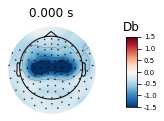

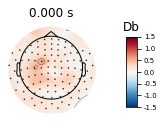

In [62]:
fig_min = plot_topomaps_min(min_beta_list, scalings = 1, units = "Db", vmin = -1.5, vmax = 1.5)
fig_max = plot_topomaps_min(max_beta_list, scalings = 1, units = "Db", vmin = -1.5, vmax = 1.5)


In [23]:
# save obtained figures
fig_min.savefig('/home/vtretyakova/Desktop/self_pace_new_exp_15_30/topomaps_extremum/topomaps_self_paced_min_15_30.jpeg', dpi = 300)
fig_max.savefig('/home/vtretyakova/Desktop/self_pace_new_exp_15_30/topomaps_extremum/topomaps_self_paced_max_15_30.jpeg', dpi = 300) 

# Time of extremum

In [63]:
# Evoked data among which we looking for extremums

def time_of_minimum (min_beta_index_list, evoked): #use function extremum_value_and_index
    min_beta_time = []

    for i in min_beta_index_list:
        t = evoked.times[i] # search time by index
        min_beta_time.append(t)
    
    table_min = pd.DataFrame()
    table_min['Sensors Name'] = sensor['Name'].tolist()
    table_min['Min beta'] = min_beta_list
    table_min['Min beta time'] = min_beta_time

    sorted_min = table_min.sort_values(by='Min beta')
    sorted_min.rename(columns = {'Sensors Name' : 'Name sensors with min beta'}, inplace = True)
    
    return (sorted_min) 
# return pd.DataFrame with beta value for each senors, sorted in ascending order
# name, number of sensors and time of minimum for each sensor
    
    
def time_of_maximum (max_beta_index_list, evoked):
    
    max_beta_time = []

    for i in max_beta_index_list:
        t = evoked.times[i]
        max_beta_time.append(t)
        
    table_max = pd.DataFrame()
    table_max['Sensors Name'] = sensor['Name'].tolist()
    table_max['Max beta'] = max_beta_list
    table_max['Max beta time'] = max_beta_time

    sorted_max = table_max.sort_values(by='Max beta', ascending=False)
    sorted_max.rename(columns = {'Sensors Name' : 'Name sensors with max beta'}, inplace = True)
    
    return (sorted_max)



# Example

In [64]:
sorted_min = time_of_minimum(min_beta_index_list, ave_beta)
sorted_max = time_of_maximum(max_beta_index_list, ave_beta)

In [65]:
sorted_min.head(10)

,Name sensors with min beta,Min beta,Min beta time
14,MEG0432,-2.512302,0.126667
41,MEG1142,-1.995613,0.120000
15,MEG0442,-1.960193,0.143333
40,MEG1132,-1.837774,0.140000
24,MEG0712,-1.718709,0.136667
38,MEG1112,-1.617308,0.120000
25,MEG0722,-1.586362,0.053333
13,MEG0422,-1.530379,0.143333
22,MEG0632,-1.387028,0.080000
37,MEG1042,-1.303321,0.146667


In [66]:
sorted_max.head(10)

,Name sensors with max beta,Max beta,Max beta time
13,MEG0422,0.589261,0.816667
15,MEG0442,0.506493,0.860000
66,MEG1812,0.431562,0.723333
69,MEG1842,0.431203,0.856667
60,MEG1632,0.413559,0.866667
12,MEG0412,0.401335,0.790000
67,MEG1822,0.401106,0.863333
68,MEG1832,0.395126,0.710000
14,MEG0432,0.394394,0.856667
22,MEG0632,0.369075,0.806667


### Knowing the name or number of the sensor, you can find information about it

In [40]:
sorted_max.loc[sorted_max['Name sensors with max beta'] == 'MEG1112']

,Name sensors with max beta,Max beta,Max beta time
38,MEG1112,0.173736,1.4


# Good luck with your data ;)